In [2]:
import pandas as pd
import numpy as np

# Data Preprocessing

In [29]:
df = pd.read_csv("/content/porter_data.csv")

In [30]:
df.shape

(197428, 14)

In [31]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [32]:
df['created_at'] = pd.to_datetime(df['created_at'])
# Converting the created_at column to datetime object

In [33]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
# Converting the actual_delivery_time column to datetime object

In [34]:
df['delivery_time'] = ((df['actual_delivery_time'] - df['created_at']).dt.total_seconds()/60).round(2)
# Making a new field name delivery time which is the difference between the 'actual delivery time' and 'created at' field

In [35]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.98
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.07
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.68
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.25
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.83


In [36]:
total_rows = len(df)
missing_info = pd.DataFrame({
    'Missing Count' : df.isnull().sum(),
    'Percentage %' : (df.isnull().sum()/total_rows * 100).round(2)
})
print(total_rows)
print(missing_info)

# This will help us look at each columns null value contributing to the total rows length in %

197428
                          Missing Count  Percentage %
market_id                           987          0.50
created_at                            0          0.00
actual_delivery_time                  7          0.00
store_id                              0          0.00
store_primary_category             4760          2.41
order_protocol                      995          0.50
total_items                           0          0.00
subtotal                              0          0.00
num_distinct_items                    0          0.00
min_item_price                        0          0.00
max_item_price                        0          0.00
total_onshift_partners            16262          8.24
total_busy_partners               16262          8.24
total_outstanding_orders          16262          8.24
delivery_time                         7          0.00


In [37]:
df = df.dropna(subset = ['market_id', 'actual_delivery_time', 'order_protocol', 'delivery_time'])

# So we dropped the rows where there where null values in these columns as they were only contributing <1% of the dataset row lenght

In [38]:
filled_count_check = df[['market_id', 'actual_delivery_time', 'order_protocol', 'delivery_time']].isnull().sum()
print(filled_count_check)

market_id               0
actual_delivery_time    0
order_protocol          0
delivery_time           0
dtype: int64


In [39]:
df['store_primary_category'].fillna('Unknown', inplace=True)

# Since store primary category null value count was contributing 2.4% of th dataset so dropping them would result in dataloss
# Instead we fill 'Unknown' to null places

/tmp/ipython-input-2804500269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_primary_category'].fillna('Unknown', inplace=True)


In [40]:
filled_count = df['store_primary_category'].isna().sum()
print(filled_count)


0


In [41]:
from sklearn.impute import KNNImputer

# For handling missing values in the column like total_busy_partners, total_onshift_partners, total_outstanding_orders

In [42]:
imputer = KNNImputer(n_neighbors = 5)

# We selected number of neighbors 5

In [43]:
columnss = ['total_busy_partners', 'total_onshift_partners', 'total_outstanding_orders']
df[columnss] = imputer.fit_transform(df[columnss])

# Training and applying it on following columns

In [44]:
df[columnss].isnull().sum()

,0
total_busy_partners,0
total_onshift_partners,0
total_outstanding_orders,0


In [45]:
df.isnull().sum()

# As we can see we have dealt with all the null values in each column

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [46]:
df.shape

(195926, 15)

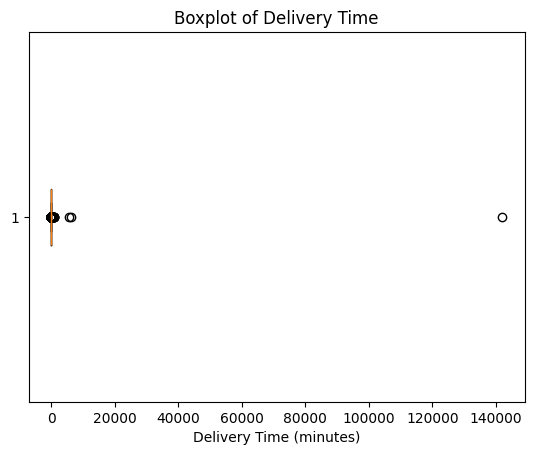

Upper bound for outliers based on IQR method: 88.32 minutes


In [48]:
import matplotlib.pyplot as plt

plt.boxplot(df['delivery_time'], vert=False)
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

Q1 = df['delivery_time'].quantile(0.25) # This finds the value below which 25% of all delivery times falls
Q3 = df['delivery_time'].quantile(0.75) # This finds the value below which 75% of all delivery times falls
IQR = Q3 - Q1 # This is interquartile range, this is difference between the upper and lower quarter delivery times
upper_bound = Q3 + 1.5 * IQR # this calculates a threshold to find usually long delivery times (outliers)

print(f"Upper bound for outliers based on IQR method: {upper_bound:.2f} minutes")

# This helps us detect outliers in dataset, so before training any model its always a good practice to deal with it
# As we can see here extreme outliers like one around is 1,40,000 minutes (almost 97 days) which is unrealastic


In [49]:
df = df[df['delivery_time'] < 88.32]

# This will drop remove all the rows where delivery time exceed by 88.32 minutes which is an outlier

In [50]:
df.shape

(189708, 15)

In [53]:
df['hour'] = df['created_at'].dt.hour
df['days_of_week'] = df['created_at'].dt.dayofweek # Monday = 0 and sunday = 6
df['is_weekend'] = df['days_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Calculating the timestamp features

In [56]:
df['store_primary_category'].unique()

# There are 70 different categories we will do one hot encoding as computer are better at understanding number than words

array(['american', 'mexican', 'Unknown', 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

In [57]:
dummies = pd.get_dummies(df['store_primary_category'], prefix = 'category')
dummies = dummies.astype(int)

# We did the one hot encoding to every category in the store_primary_category column

In [ ]:
dummies.head()

,category_Unknown,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df = pd.concat([df, dummies],  axis = 1)
# Joining the one hot encoded dataframe to our original dataframe

In [59]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1.0,1,1900,1,1900,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,Unknown,1.0,6,6900,5,600,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,Unknown,1.0,3,3900,3,1100,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df.drop(columns = ['store_primary_category'], axis = 1)
# Since we no longer require the store_primary_category column so we dropped it

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,1.0,4,3441,4,557,1239,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,2.0,1,1900,1,1400,1400,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,1.0,1,1900,1,1900,1900,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,1.0,6,6900,5,600,1800,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,1.0,3,3900,3,1100,1600,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,4.0,3,1389,3,345,649,...,0,0,0,0,0,0,0,0,0,0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,4.0,6,3010,4,405,825,...,0,0,0,0,0,0,0,0,0,0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,4.0,5,1836,3,300,399,...,0,0,0,0,0,0,0,0,0,0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,1.0,1,1175,1,535,535,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.shape

(189708, 93)

# Model Training

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
features = ['hour', 'days_of_week', 'is_weekend', 'total_items', 'num_distinct_items', 'subtotal',
            'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners',
            'total_outstanding_orders']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

X = pd.concat([df[features], dummies], axis = 1)
y = df['delivery_time']

# X includes all the features and y include the target


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Splited the data into traning and testing, on 80% of the data we'll do training and rest for testing

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# First we start with the very basic model which is the Linear Regression

LinearRegression()

In [68]:
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae:.2f} minutes")
print(f"Root Mean Squared Error is : {rmse:.2f} minutes")


Mean Absolute Error: 10.64 minutes
Root Mean Squared Error is : 13.36 minutes


In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [70]:
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae:.2f} minutes")
print(f"Root Mean Squared Error: {rmse:.2f} minutes")

Mean Absolute Error: 10.36 minutes
Root Mean Squared Error: 13.04 minutes


In [72]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state = 42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [73]:
y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Abolsute Error:{mae:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")

Mean Abolsute Error:10.14
Root Mean Squared Error:12.78


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"TensorFlow MAE: {mae:.2f} minutes")
print(f"TensorFlow RMSE: {np.sqrt(loss):.2f} minutes")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 339.3801 - mae: 13.7459 - val_loss: 186.9899 - val_mae: 10.6245
Epoch 2/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 196.8657 - mae: 11.0878 - val_loss: 181.0945 - val_mae: 10.5780
Epoch 3/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 192.2855 - mae: 10.9632 - val_loss: 183.0767 - val_mae: 10.5874
Epoch 4/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 187.2500 - mae: 10.8194 - val_loss: 205.5382 - val_mae: 10.9196
Epoch 5/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 182.7439 - mae: 10.6929 - val_loss: 210.9477 - val_mae: 11.0173
Epoch 6/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 181.3492 - mae: 10.6420 - val_loss: 200.9162 - val_mae: 10.7880
Epoch 7/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 180.7781 - mae: 10.6384 - val_loss: 200.0736 - val_mae: 10.7897
Epoch 8/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 177.4248 - mae: 10.5473 - val_loss: 184.8649 - v

In [75]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# --- XGBoost: 5-Fold Cross-Validation ---
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Cross-Validation for MAE and RMSE
cv_scores_mae = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_rmse = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"XGBoost Cross-Validated MAE: {-cv_scores_mae.mean():.2f} minutes")
print(f"XGBoost Cross-Validated RMSE: {np.sqrt(-cv_scores_rmse.mean()):.2f} minutes")

# Train/Test Performance Check
xgb.fit(X_train, y_train)
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("\nXGBoost Train vs. Test Performance:")
print(f"Train MAE: {train_mae_xgb:.2f} minutes, Test MAE: {test_mae_xgb:.2f} minutes")
print(f"Train RMSE: {train_rmse_xgb:.2f} minutes, Test RMSE: {test_rmse_xgb:.2f} minutes")

# --- TensorFlow: Validation Split Analysis ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Train/Test Performance Check
y_train_pred_tf = model.predict(X_train_scaled)
y_test_pred_tf = model.predict(X_test_scaled)
train_mae_tf = mean_absolute_error(y_train, y_train_pred_tf)
train_rmse_tf = np.sqrt(mean_squared_error(y_train, y_train_pred_tf))
test_mae_tf = mean_absolute_error(y_test, y_test_pred_tf)
test_rmse_tf = np.sqrt(mean_squared_error(y_test, y_test_pred_tf))

print("\nTensorFlow Train vs. Test Performance:")
print(f"Train MAE: {train_mae_tf:.2f} minutes, Test MAE: {test_mae_tf:.2f} minutes")
print(f"Train RMSE: {train_rmse_tf:.2f} minutes, Test RMSE: {test_rmse_tf:.2f} minutes")

# Validation Performance from Training
print(f"\nTensorFlow Best Validation MAE: {min(history.history['val_mae']):.2f} minutes")
print(f"TensorFlow Best Validation RMSE: {np.sqrt(min(history.history['val_loss'])):.2f} minutes")

XGBoost Cross-Validated MAE: 10.11 minutes
XGBoost Cross-Validated RMSE: 12.75 minutes

XGBoost Train vs. Test Performance:
Train MAE: 10.00 minutes, Test MAE: 10.14 minutes
Train RMSE: 12.61 minutes, Test RMSE: 12.78 minutes
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3795/3795 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 350.4374 - mae: 13.9265 - val_loss: 183.3861 - val_mae: 10.5760
Epoch 2/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 197.7284 - mae: 11.1062 - val_loss: 182.3887 - val_mae: 10.5487
Epoch 3/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 191.6908 - mae: 10.9593 - val_loss: 206.9217 - val_mae: 10.9673
Epoch 4/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 186.3927 - mae: 10.8195 - val_loss: 190.0336 - val_mae: 10.6051
Epoch 5/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 183.3597 - mae: 10.7268 - val_loss: 219.5584 - val_mae: 11.2681
Epoch 6/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 180.4294 - mae: 10.6384 - val_loss: 192.7330 - val_mae: 10.6325
Epoch 7/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 177.1750 - mae: 10.5291 - val_loss: 183.8360 - val_mae: 10.4819
Epoch 8/50
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 176.1400 - mae: 10.5049 - val_loss: 182.0126 - val_mae: 10.